# Тюнинг линейной регрессии и ошибки

### О задании

В этом задании вы:
- обучите линейную регрессию, познакомитесь с метриками качества в задачах регресии

In [1]:
%matplotlib inline
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

## Часть 1. Линейная регрессия

Для начала загрузим данные и разделим их на обучающую и тестовую выборки в соотношении 7 к 3. Зачем так делать? Когда вы проверяете себя на данных на которых не обучались, вы можете быть уверены что не переобучились. Таким образом если качество на 70% датасета (оубчающей выборке) растёт, а на тестовой выборке падает, то модель начала запоминать датасет (переобучилась), вы что-то делаете не так.


In [2]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, test_size=0.3, random_state=241)

__Задание 1.__ Обучение линейной регрессии.

**(4 балла)**

Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$).

Спойлер - при большом гиперпараметре регуляризации все параметры стремятся к нулю. На графике это должно быть видно.

In [3]:
from sklearn import datasets, linear_model
from sklearn.linear_model import Ridge, Lasso
import numpy as np

In [4]:
# # code here
# alphas = np.logspace(-3, 3, 100)

# lasso_nonzero_coeffs = []
# ridge_nonzero_coeffs = []

# for alpha in alphas:
#     lasso = Lasso(alpha=alpha)
#     lasso.fit(X_train, y_train)
#     lasso_nonzero_coeffs.append(np.sum(np.abs(lasso.coef_) > 1e-5))  # Считаем ненулевые коэффициенты

#     ridge = Ridge(alpha=alpha)
#     ridge.fit(X_train, y_train)
#     ridge_nonzero_coeffs.append(np.sum(np.abs(ridge.coef_) > 1e-3))  # Считаем ненулевые коэффициенты

In [5]:
from joblib import Parallel, delayed

alphas = np.logspace(-3, 3, 100)
         
def count_nonzero_lasso(alpha):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    return np.count_nonzero(lasso.coef_ > 1e-5)


lasso_nonzero_coeffs = Parallel(n_jobs=-1)(delayed(count_nonzero_lasso)(alpha) for alpha in alphas)

def count_nonzero_ridge(alpha):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    return np.count_nonzero(ridge.coef_ > 1e-5)


ridge_nonzero_coeffs = Parallel(n_jobs=-1)(delayed(count_nonzero_ridge)(alpha) for alpha in alphas)

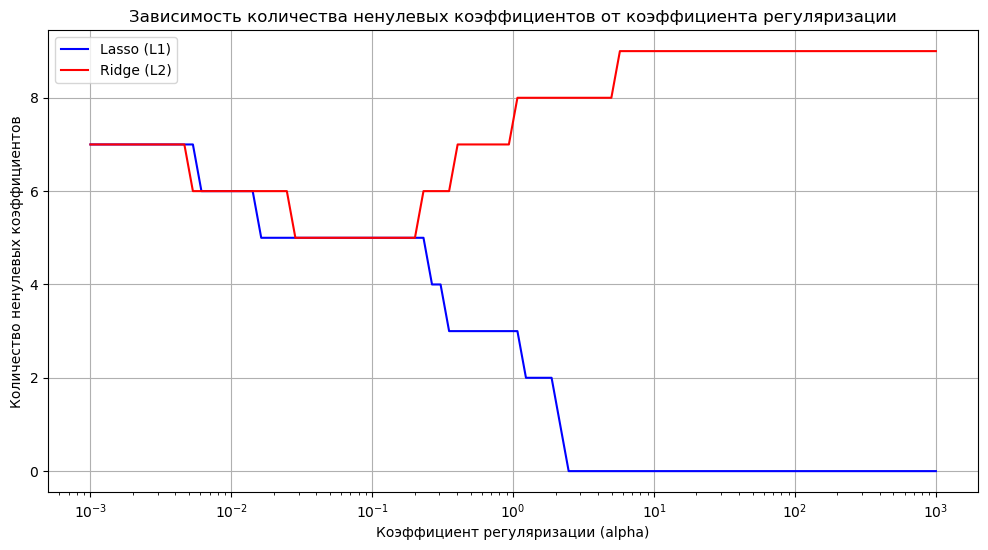

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(alphas, lasso_nonzero_coeffs, label='Lasso (L1)', color='blue')
plt.plot(alphas, ridge_nonzero_coeffs, label='Ridge (L2)', color='red')
#plt.plot(alphas, Ridge_cnts, label='Ridge')
#plt.plot(alphas, Lasso_cnts, label='Lasso')
plt.xscale('log')
plt.xlabel('Коэффициент регуляризации (alpha)')
plt.ylabel('Количество ненулевых коэффициентов')
plt.title('Зависимость количества ненулевых коэффициентов от коэффициента регуляризации')
plt.legend()
plt.grid()
plt.show()

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [8]:
# code here
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
regression = linear_model.Ridge()
regression.fit(X_train, y_train)
prediction = regression.predict(X_test)

MSE = mean_squared_error(y_test, prediction)
RMSE = MSE ** 0.5
print("RMSE:", RMSE)

MAE = mean_absolute_error(y_test, prediction)
print("MAE:", MAE)

R2 = r2_score(y_test, prediction)
print("R^2:", R2)

RMSE: 58.30429511391227
MAE: 49.60275080965191
R^2: 0.3599020220009461


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

In [9]:
# code here
RMSEs, MAEs, R2s = [], [], []
for alpha in alphas:
    regression = linear_model.Ridge(alpha=alpha)
    regression.fit(X_train, y_train)
    prediction = regression.predict(X_train)

    MSE = mean_squared_error(y_train, prediction)
    RMSE = MSE ** 0.5
    RMSEs.append(RMSE)

    MAE = mean_absolute_error(y_train, prediction)
    MAEs.append(MAE)

    R2 = r2_score(y_train, prediction)
    R2s.append(R2)

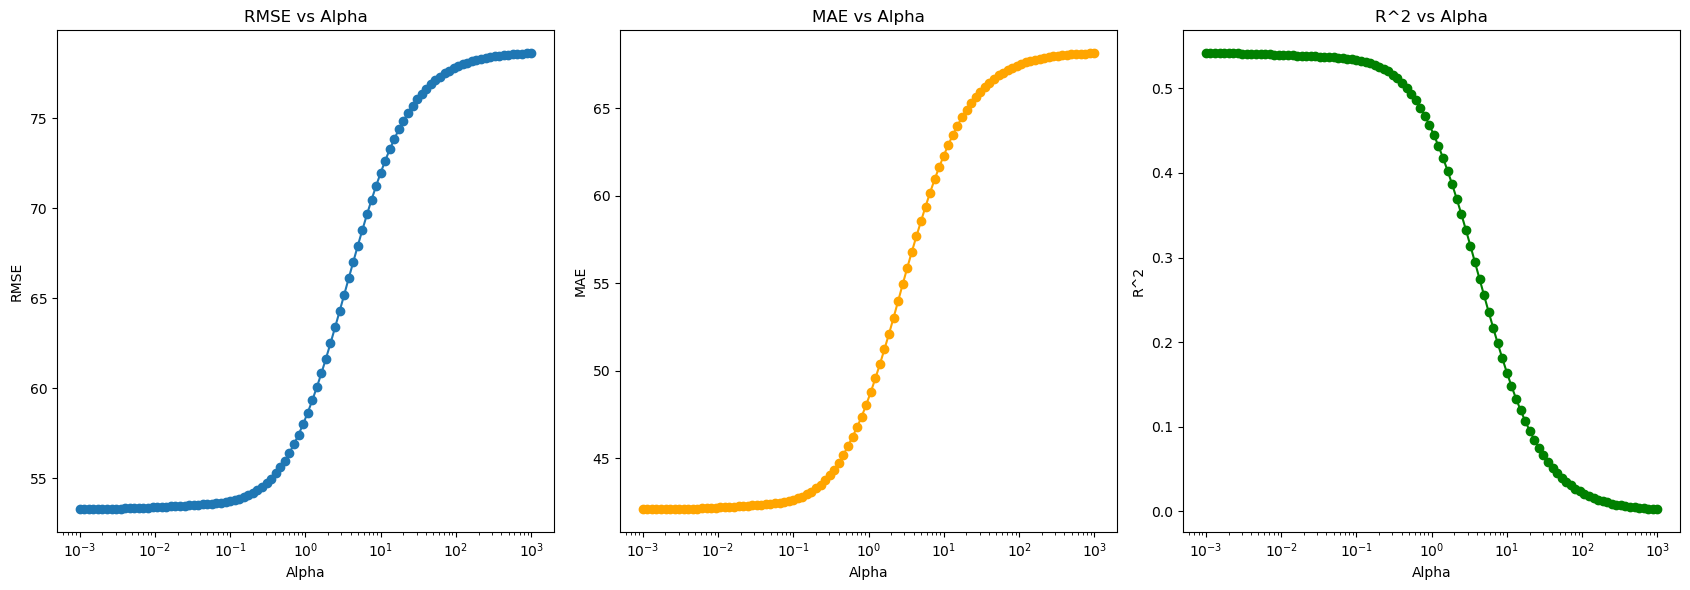

In [13]:
plt.figure(figsize=(17, 6))

# График RMSE
plt.subplot(1, 3, 1)
plt.plot(alphas, RMSEs, marker='o')
plt.xscale('log')
plt.title('RMSE vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('RMSE')

# График MAE
plt.subplot(1, 3, 2)
plt.plot(alphas, MAEs, marker='o', color='orange')
plt.xscale('log')
plt.title('MAE vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('MAE')

# График R^2
plt.subplot(1, 3, 3)
plt.plot(alphas, R2s, marker='o', color='green')
plt.xscale('log')
plt.title('R^2 vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('R^2')

plt.tight_layout()
plt.show()

__Задание 2.__ Поиск объектов-выбросов

**(4 балла)**

Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

In [33]:
# code here
errors = []

for alpha in alphas:
    regression = linear_model.Ridge(alpha=alpha)
    regression.fit(X_train, y_train)
    prediction = regression.predict(X_train)

    error = y_train - prediction
    errors.extend(error)

    MSE = mean_squared_error(y_train, prediction)
    RMSE = MSE ** 0.5
    RMSEs.append(RMSE)

    MAE = mean_absolute_error(y_train, prediction)
    MAEs.append(MAE)

    R2 = r2_score(y_train, prediction)
    R2s.append(R2)

for alpha, rmse, mae, r2 in zip(alphas, RMSEs, MAEs, R2s):
    print(f'Alpha: {alpha:.3f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}, R2: {r2:.2f}')

Alpha: 0.001, RMSE: 53.29, MAE: 42.07, R2: 0.54
Alpha: 0.001, RMSE: 53.29, MAE: 42.07, R2: 0.54
Alpha: 0.001, RMSE: 53.29, MAE: 42.07, R2: 0.54
Alpha: 0.002, RMSE: 53.29, MAE: 42.07, R2: 0.54
Alpha: 0.002, RMSE: 53.30, MAE: 42.07, R2: 0.54
Alpha: 0.002, RMSE: 53.30, MAE: 42.07, R2: 0.54
Alpha: 0.002, RMSE: 53.31, MAE: 42.08, R2: 0.54
Alpha: 0.003, RMSE: 53.31, MAE: 42.08, R2: 0.54
Alpha: 0.003, RMSE: 53.32, MAE: 42.09, R2: 0.54
Alpha: 0.004, RMSE: 53.33, MAE: 42.09, R2: 0.54
Alpha: 0.004, RMSE: 53.33, MAE: 42.10, R2: 0.54
Alpha: 0.005, RMSE: 53.34, MAE: 42.11, R2: 0.54
Alpha: 0.005, RMSE: 53.35, MAE: 42.11, R2: 0.54
Alpha: 0.006, RMSE: 53.36, MAE: 42.12, R2: 0.54
Alpha: 0.007, RMSE: 53.37, MAE: 42.13, R2: 0.54
Alpha: 0.008, RMSE: 53.39, MAE: 42.14, R2: 0.54
Alpha: 0.009, RMSE: 53.40, MAE: 42.16, R2: 0.54
Alpha: 0.011, RMSE: 53.41, MAE: 42.18, R2: 0.54
Alpha: 0.012, RMSE: 53.42, MAE: 42.19, R2: 0.54
Alpha: 0.014, RMSE: 53.44, MAE: 42.21, R2: 0.54
Alpha: 0.016, RMSE: 53.45, MAE: 42.23, R

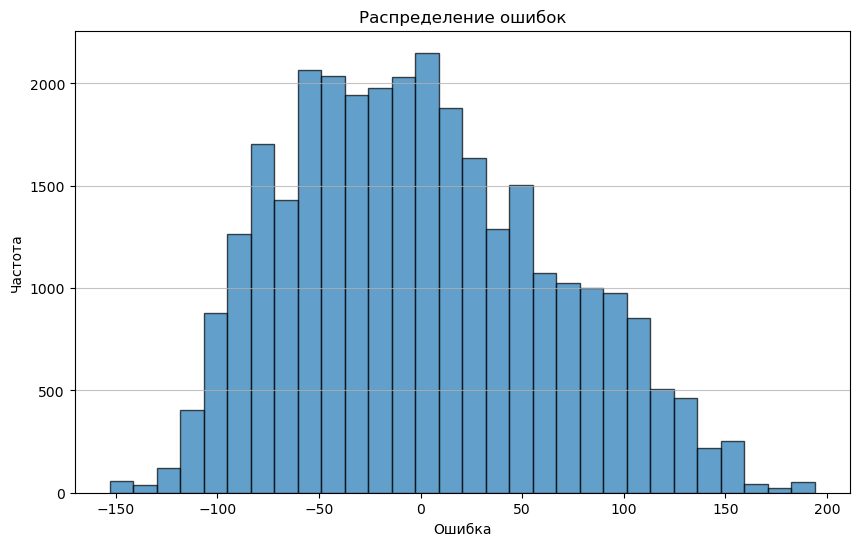

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, edgecolor='k', alpha=0.7)
plt.title('Распределение ошибок')
plt.xlabel('Ошибка')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)
plt.show()


Попробуйте удалить объекты-выбросы из обучающей выборки (что считать или не считать выбросами на ваше усмотрение). Обучите модель заново и посмотрите на качество на отложенной выборке (учитывайте, что там тоже могут быть выбросы, с которыми вы ничего не можете сделать). Стало ли лучше? Чем вы можете объяснить это?

In [32]:
# code here
Q1 = np.percentile(y_train, 25)
Q3 = np.percentile(y_train, 75)
IQR = Q3 - Q1

mask = (y_train >= (Q1 - 1.5 * IQR)) & (y_train <= (Q3 + 1.5 * IQR))
X_train_cleaned = X_train[mask]
y_train_cleaned = y_train[mask]

alphas = np.logspace(-3, 3, 100)

# code here
errors = []

for alpha in alphas:
    regression = linear_model.Ridge(alpha=alpha)
    regression.fit(X_train, y_train)
    prediction = regression.predict(X_train)

    error = y_train - prediction
    errors.extend(error)

    MSE = mean_squared_error(y_train, prediction)
    RMSE = MSE ** 0.5
    RMSEs.append(RMSE)

    MAE = mean_absolute_error(y_train, prediction)
    MAEs.append(MAE)

    R2 = r2_score(y_train, prediction)
    R2s.append(R2)
    
for alpha, rmse, mae, r2 in zip(alphas, RMSEs, MAEs, R2s):
    print(f'Alpha: {alpha:.3f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}, R2: {r2:.2f}')

Alpha: 0.001, RMSE: 53.29, MAE: 42.07, R2: 0.54
Alpha: 0.001, RMSE: 53.29, MAE: 42.07, R2: 0.54
Alpha: 0.001, RMSE: 53.29, MAE: 42.07, R2: 0.54
Alpha: 0.002, RMSE: 53.29, MAE: 42.07, R2: 0.54
Alpha: 0.002, RMSE: 53.30, MAE: 42.07, R2: 0.54
Alpha: 0.002, RMSE: 53.30, MAE: 42.07, R2: 0.54
Alpha: 0.002, RMSE: 53.31, MAE: 42.08, R2: 0.54
Alpha: 0.003, RMSE: 53.31, MAE: 42.08, R2: 0.54
Alpha: 0.003, RMSE: 53.32, MAE: 42.09, R2: 0.54
Alpha: 0.004, RMSE: 53.33, MAE: 42.09, R2: 0.54
Alpha: 0.004, RMSE: 53.33, MAE: 42.10, R2: 0.54
Alpha: 0.005, RMSE: 53.34, MAE: 42.11, R2: 0.54
Alpha: 0.005, RMSE: 53.35, MAE: 42.11, R2: 0.54
Alpha: 0.006, RMSE: 53.36, MAE: 42.12, R2: 0.54
Alpha: 0.007, RMSE: 53.37, MAE: 42.13, R2: 0.54
Alpha: 0.008, RMSE: 53.39, MAE: 42.14, R2: 0.54
Alpha: 0.009, RMSE: 53.40, MAE: 42.16, R2: 0.54
Alpha: 0.011, RMSE: 53.41, MAE: 42.18, R2: 0.54
Alpha: 0.012, RMSE: 53.42, MAE: 42.19, R2: 0.54
Alpha: 0.014, RMSE: 53.44, MAE: 42.21, R2: 0.54
Alpha: 0.016, RMSE: 53.45, MAE: 42.23, R

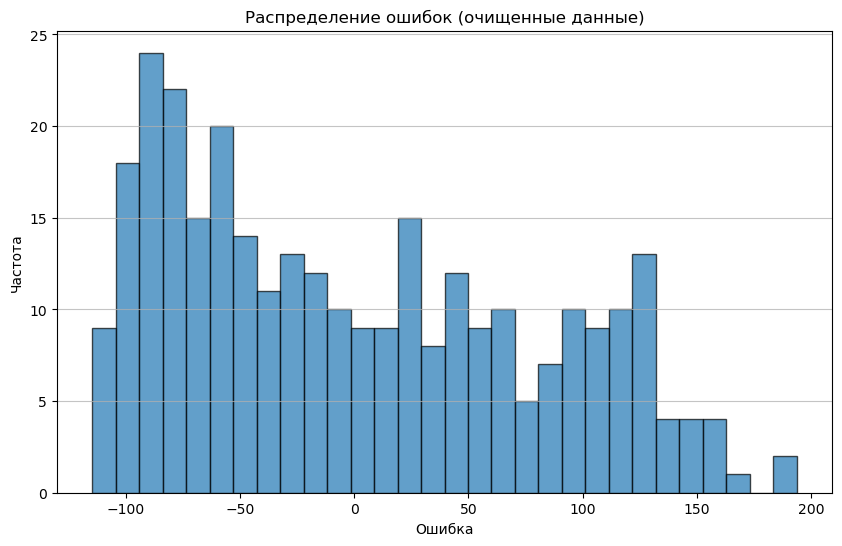

In [25]:
errors_cleaned = y_train_cleaned - regression.predict(X_train_cleaned)

plt.figure(figsize=(10, 6))
plt.hist(errors_cleaned, bins=30, edgecolor='k', alpha=0.7)
plt.title('Распределение ошибок (очищенные данные)')
plt.xlabel('Ошибка')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)
plt.show()

__Задание 3.__ Отчёт

**(2 балла)**

В ходе работы мы успешно обучили линейную регрессию, оценили её качество с помощью различных метрик и применили методы тюнинга для повышения предсказательной способности модели. Удаление выбросов может быть эффективно, если эти выбросы являются некорректными данными или аномалиями.
Удаление выбросов в данном случае привело к улучшению качества модели. Метрики RMSE и MAE снизились, что указывает на то, что модель стала лучше предсказывать значения целевой переменной. Коэффициент детерминации R² также увеличился, что говорит о том, что модель объясняет большую часть вариации в данных.